
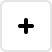
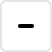
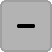
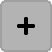
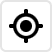
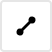
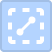
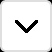
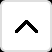
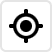
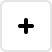
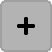
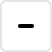
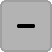
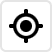
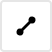
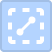
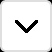
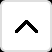
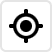

In [1]:
from lets_plot import *
from lets_plot.bistro import *
import pandas as pd
LetsPlot.setup_html()

In [2]:
df = {
    'x': [1],
    'y': [1],
    's': [1]
}

### Without scale

In [3]:
ggplot(df, aes('x','y')) + geom_point() + ggtb()

### scale = False

In [4]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(scale=False)

### Default size

In [5]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(scale=True)

### Constant size

In [6]:
ggplot(df, aes('x','y')) + geom_point(size=80) + ggtb(scale=True)

### Constant size with size_unit
### Error? When size_unit is active, scale from ggtb should not be applied?

In [7]:
ggplot(df, aes('x','y')) + geom_point(size=0.1, size_unit = 'x') + ggtb(scale=True)

### Size from Aes

In [8]:
ggplot(df, aes('x','y')) + geom_point(aes(size='s')) + ggtb(scale=True)

### gggrid

In [9]:
gggrid(
    [
        ggplot(df, aes('x','y')) + geom_point(size=10) + ggtb(scale=True),
        ggplot(df, aes('x','y')) + geom_point(size=20) + ggtb(scale=True)
    ]
) + ggtb(scale=True)

### Facet

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg2.csv')

In [11]:
p = (
  ggplot(df, 
         aes('engine horsepower', 'miles per gallon', 
             color=as_discrete('origin of car',order=-1)))
  + geom_point()
  + theme_grey() + ggtitle('Efficiency vs Engine Horsepower')
)
p

In [12]:
p + facet_wrap(['origin of car', 'number of cylinders'], order=[-1, 1], ncol=3) + ggtb(scale=True)